In [90]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

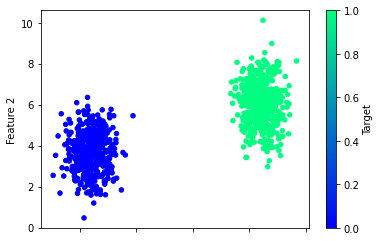

In [91]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [92]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [93]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [94]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [95]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [96]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [97]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [99]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 160us/sample - loss: 0.6147 - acc: 0.7040
Epoch 2/100
750/750 [==============================] - 0s 31us/sample - loss: 0.6041 - acc: 0.7187
Epoch 3/100
750/750 [==============================] - 0s 29us/sample - loss: 0.5936 - acc: 0.7267
Epoch 4/100
750/750 [==============================] - 0s 36us/sample - loss: 0.5836 - acc: 0.7387
Epoch 5/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5739 - acc: 0.7480
Epoch 6/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5643 - acc: 0.7627
Epoch 7/100
750/750 [==============================] - 0s 31us/sample - loss: 0.5550 - acc: 0.7720
Epoch 8/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5457 - acc: 0.7800
Epoch 9/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5366 - acc: 0.7880
Epoch 10/100
750/750 [==============================] - 0s 29us/sample - loss: 0.5275 - acc: 0.7947
Epoch 11

750/750 [==============================] - 0s 33us/sample - loss: 0.1164 - acc: 0.9920
Epoch 83/100
750/750 [==============================] - 0s 33us/sample - loss: 0.1140 - acc: 0.9920
Epoch 84/100
750/750 [==============================] - 0s 28us/sample - loss: 0.1116 - acc: 0.9920
Epoch 85/100
750/750 [==============================] - 0s 32us/sample - loss: 0.1093 - acc: 0.9920
Epoch 86/100
750/750 [==============================] - 0s 29us/sample - loss: 0.1071 - acc: 0.9933
Epoch 87/100
750/750 [==============================] - 0s 32us/sample - loss: 0.1050 - acc: 0.9960
Epoch 88/100
750/750 [==============================] - 0s 29us/sample - loss: 0.1029 - acc: 0.9960
Epoch 89/100
750/750 [==============================] - 0s 35us/sample - loss: 0.1009 - acc: 0.9973
Epoch 90/100
750/750 [==============================] - 0s 31us/sample - loss: 0.0989 - acc: 0.9973
Epoch 91/100
750/750 [==============================] - 0s 29us/sample - loss: 0.0970 - acc: 0.9973
Epoch 92/100


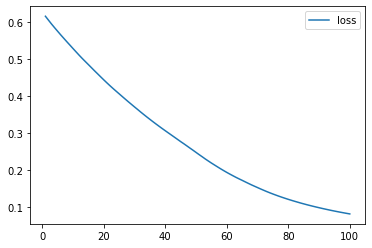

In [100]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

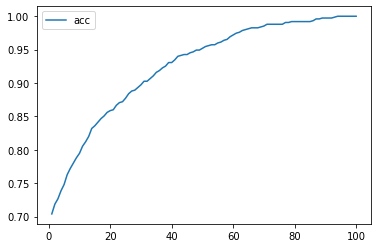

In [101]:
# Plot the accuracy
history_df.plot(y="acc")

In [102]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0755 - acc: 1.0000
Loss: 0.07554711085557937, Accuracy: 1.0


In [103]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

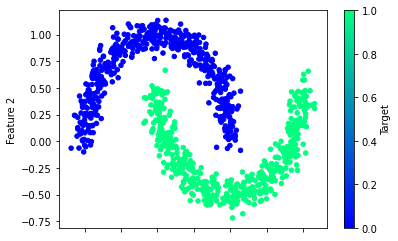

In [104]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [105]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [106]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 36us/sample - loss: 1.3641 - acc: 0.3853
Epoch 2/100
750/750 [==============================] - 0s 33us/sample - loss: 1.1497 - acc: 0.4187
Epoch 3/100
750/750 [==============================] - 0s 28us/sample - loss: 1.0111 - acc: 0.4507
Epoch 4/100
750/750 [==============================] - 0s 32us/sample - loss: 0.9248 - acc: 0.4840
Epoch 5/100
750/750 [==============================] - 0s 35us/sample - loss: 0.8644 - acc: 0.5080
Epoch 6/100
750/750 [==============================] - 0s 28us/sample - loss: 0.8160 - acc: 0.5347
Epoch 7/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7786 - acc: 0.5587
Epoch 8/100
750/750 [==============================] - 0s 36us/sample - loss: 0.7469 - acc: 0.5760
Epoch 9/100
750/750 [==============================] - 0s 31us/sample - loss: 0.7198 - acc: 0.5947
Epoch 10/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6973 - acc: 0.6107
Epoch 11/

750/750 [==============================] - 0s 31us/sample - loss: 0.2797 - acc: 0.8933
Epoch 84/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2791 - acc: 0.8933
Epoch 85/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2784 - acc: 0.8933
Epoch 86/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2778 - acc: 0.8920
Epoch 87/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2772 - acc: 0.8920
Epoch 88/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2767 - acc: 0.8920
Epoch 89/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2761 - acc: 0.8920
Epoch 90/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2756 - acc: 0.8907
Epoch 91/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2750 - acc: 0.8907
Epoch 92/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2745 - acc: 0.8907
Epoch 93/100


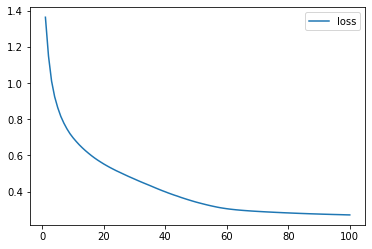

In [107]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

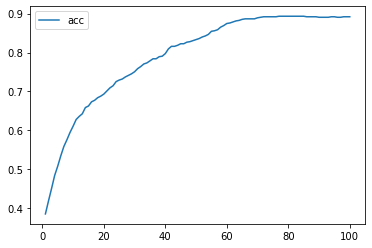

In [108]:
# Plot the loss
history_df.plot(y="acc")

In [109]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [110]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [111]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 171us/sample - loss: 0.6123 - acc: 0.5467
Epoch 2/100
750/750 [==============================] - 0s 27us/sample - loss: 0.5831 - acc: 0.7307
Epoch 3/100
750/750 [==============================] - 0s 26us/sample - loss: 0.5557 - acc: 0.7840
Epoch 4/100
750/750 [==============================] - 0s 25us/sample - loss: 0.5291 - acc: 0.8080
Epoch 5/100
750/750 [==============================] - 0s 25us/sample - loss: 0.5033 - acc: 0.8200
Epoch 6/100
750/750 [==============================] - 0s 25us/sample - loss: 0.4781 - acc: 0.8213
Epoch 7/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4534 - acc: 0.8267
Epoch 8/100
750/750 [==============================] - 0s 27us/sample - loss: 0.4297 - acc: 0.8347
Epoch 9/100
750/750 [==============================] - 0s 31us/sample - loss: 0.4076 - acc: 0.8453
Epoch 10/100
750/750 [==============================] - 0s 27us/sample - loss: 0.3871 - acc: 0.8547
Epoch 11

750/750 [==============================] - 0s 24us/sample - loss: 0.1579 - acc: 0.9347
Epoch 84/100
750/750 [==============================] - 0s 27us/sample - loss: 0.1562 - acc: 0.9347
Epoch 85/100
750/750 [==============================] - 0s 25us/sample - loss: 0.1548 - acc: 0.9347
Epoch 86/100
750/750 [==============================] - 0s 27us/sample - loss: 0.1531 - acc: 0.9347
Epoch 87/100
750/750 [==============================] - 0s 25us/sample - loss: 0.1516 - acc: 0.9347
Epoch 88/100
750/750 [==============================] - 0s 24us/sample - loss: 0.1501 - acc: 0.9347
Epoch 89/100
750/750 [==============================] - 0s 25us/sample - loss: 0.1486 - acc: 0.9347
Epoch 90/100
750/750 [==============================] - 0s 27us/sample - loss: 0.1470 - acc: 0.9360
Epoch 91/100
750/750 [==============================] - 0s 25us/sample - loss: 0.1454 - acc: 0.9360
Epoch 92/100
750/750 [==============================] - 0s 29us/sample - loss: 0.1439 - acc: 0.9373
Epoch 93/100


Ramen Ratings

In [112]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Holland            4
Fiji               4
Poland             4
Sarawak            3
Dubai              3
Finland            3
Sweden             3
Estonia            2
Ghana              2
Nigeria            1
United States      1
Name: Country, dtype: int64

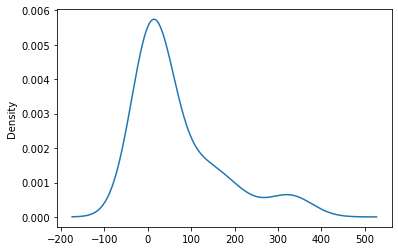

In [113]:
# Visualize the value counts
country_counts.plot.density()

In [114]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [115]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


HR Data

In [117]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [118]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [119]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [120]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [121]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [122]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [123]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [124]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [125]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [126]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [127]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [128]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [129]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 448       
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [131]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
  32/1102 [..............................] - ETA: 4s - loss: 0.1534 - acc: 0.9375
Epoch 00001: saving model to checkpoints/weights.01.hdf5
1102/1102 [==============================] - 0s 166us/sample - loss: 0.1557 - acc: 0.9428
Epoch 2/100
  32/1102 [..............................] - ETA: 0s - loss: 0.1182 - acc: 0.9688
Epoch 00002: saving model to checkpoints/weights.02.hdf5
1102/1102 [==============================] - 0s 41us/sample - loss: 0.1514 - acc: 0.9446
Epoch 3/100
  32/1102 [..............................] - ETA: 0s - loss: 0.1862 - acc: 0.9062
Epoch 00003: saving model to checkpoints/weights.03.hdf5
1102/1102 [==============================] - 0s 42us/sample - loss: 0.1506 - acc: 0.9437
Epoch 4/100
  32/1102 [..............................] - ETA: 0s - loss: 0.3164 - acc: 0.8750
Epoch 00004: saving model to checkpoints/weights.04.hdf5
1102/1102 [==============================] - 0s 40us/sample - loss: 0.1488 - acc: 0.9474
Epoch 5/100
  32/1102 [................

Epoch 34/100
  32/1102 [..............................] - ETA: 0s - loss: 0.1016 - acc: 0.9375
Epoch 00034: saving model to checkpoints/weights.34.hdf5
1102/1102 [==============================] - 0s 46us/sample - loss: 0.1183 - acc: 0.9574
Epoch 35/100
  32/1102 [..............................] - ETA: 0s - loss: 0.0635 - acc: 1.0000
Epoch 00035: saving model to checkpoints/weights.35.hdf5
1102/1102 [==============================] - 0s 46us/sample - loss: 0.1166 - acc: 0.9610
Epoch 36/100
  32/1102 [..............................] - ETA: 0s - loss: 0.1732 - acc: 0.9375
Epoch 00036: saving model to checkpoints/weights.36.hdf5
1102/1102 [==============================] - 0s 45us/sample - loss: 0.1161 - acc: 0.9564
Epoch 37/100
  32/1102 [..............................] - ETA: 0s - loss: 0.0719 - acc: 0.9688
Epoch 00037: saving model to checkpoints/weights.37.hdf5
1102/1102 [==============================] - 0s 42us/sample - loss: 0.1153 - acc: 0.9592
Epoch 38/100
  32/1102 [............

Epoch 67/100
  32/1102 [..............................] - ETA: 0s - loss: 0.0717 - acc: 0.9688
Epoch 00067: saving model to checkpoints/weights.67.hdf5
1102/1102 [==============================] - 0s 43us/sample - loss: 0.0948 - acc: 0.9646
Epoch 68/100
  32/1102 [..............................] - ETA: 0s - loss: 0.0615 - acc: 1.0000
Epoch 00068: saving model to checkpoints/weights.68.hdf5
1102/1102 [==============================] - 0s 39us/sample - loss: 0.0943 - acc: 0.9655
Epoch 69/100
  32/1102 [..............................] - ETA: 0s - loss: 0.0346 - acc: 1.0000
Epoch 00069: saving model to checkpoints/weights.69.hdf5
1102/1102 [==============================] - 0s 40us/sample - loss: 0.0939 - acc: 0.9673
Epoch 70/100
  32/1102 [..............................] - ETA: 0s - loss: 0.0959 - acc: 0.9688
Epoch 00070: saving model to checkpoints/weights.70.hdf5
1102/1102 [==============================] - 0s 37us/sample - loss: 0.0934 - acc: 0.9682
Epoch 71/100
  32/1102 [............

  32/1102 [..............................] - ETA: 0s - loss: 0.0935 - acc: 0.9688
Epoch 00100: saving model to checkpoints/weights.100.hdf5
1102/1102 [==============================] - 0s 38us/sample - loss: 0.0744 - acc: 0.9746
368/368 - 0s - loss: 0.8098 - acc: 0.8478
Loss: 0.8097574814506199, Accuracy: 0.8478260636329651


In [132]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

368/368 - 0s - loss: 0.8098 - acc: 0.8478
Loss: 0.8097830609135006, Accuracy: 0.8478260636329651


In [133]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [134]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [135]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

368/368 - 0s - loss: 0.8098 - acc: 0.8478
Loss: 0.8097830609135006, Accuracy: 0.8478260636329651
